# Project: Heart Disease Prediction (Predicting Heart Disease using Machine Learning)

## 1.1 Phát biểu bài toán
Bệnh tim là một trong những nguyên nhân hàng đầu gây tử vong trên thế giới, và việc chẩn đoán sớm có thể cứu sống nhiều người. Dự án này sử dụng tập dữ liệu Cleveland từ thư viện UCI Machine Learning Repository, bao gồm các thông tin về các bệnh nhân và các yếu tố có thể liên quan đến nguy cơ mắc bệnh tim.

Tập dữ liệu này bao gồm 303 bản ghi và 14 thuộc tính, bao gồm các chỉ số sức khỏe như tuổi tác, giới tính, mức độ cholesterol, huyết áp, tình trạng bệnh tim trước đó và các yếu tố nguy cơ khác. Mục tiêu là xây dựng một mô hình dự đoán khả năng mắc bệnh tim, phân loại bệnh nhân vào hai nhóm: có bệnh tim hoặc không có bệnh tim.

## 1.2 Mô tả vấn đề
Sử dụng tập dữ liệu Cleveland để xây dựng một mô hình học máy nhằm dự đoán khả năng mắc bệnh tim dựa trên các yếu tố nguy cơ. Mô hình sẽ phân loại các bệnh nhân thành hai nhóm: có bệnh tim hoặc không có bệnh tim.

##1.3 Giả thuyết
Một số yếu tố có thể ảnh hưởng đến khả năng mắc bệnh tim:

- Tuổi: Tuổi tác có thể ảnh hưởng lớn đến nguy cơ mắc bệnh tim, với người cao tuổi có nguy cơ mắc bệnh cao hơn.
- Cholesterol trong máu: Mức cholesterol cao có thể dẫn đến các vấn đề về tim mạch.
- Huyết áp: Huyết áp cao có thể làm tăng nguy cơ mắc bệnh tim.
- Loại đau ngực: Các cơn đau ngực có thể là dấu hiệu của bệnh tim.
- Tình trạng thalassemia: Đây là một yếu tố di truyền có thể ảnh hưởng đến sức khỏe tim mạch.

### 1.4.1 General Overview: Tổng quan chung về dữ liệu
Dữ liệu có tổng cộng 303 bản ghi và 14 thuộc tính.
Các thuộc tính bao gồm các giá trị liên quan đến tình trạng sức khỏe và các yếu tố nguy cơ của bệnh nhân.
### 1.4.2 Exploratory Data Analysis (EDA): Phân tích dữ liệu thăm dò

Phân tích phân phối của các thuộc tính (histogram, boxplot).
Xác định các giá trị thiếu (missing values) và xử lý chúng.
Kiểm tra mối quan hệ giữa các thuộc tính và mục tiêu (Target) bằng các biểu đồ tương quan (correlation heatmap, scatter plot).

### 1.4.3 Data Preprocessing: Tiền xử lý dữ liệu
- Xử lý dữ liệu thiếu: Nếu có giá trị thiếu, sẽ có các phương pháp như loại bỏ dòng hoặc điền giá trị trung bình/mediana tùy vào tính chất dữ liệu.
- Chuyển đổi dữ liệu phân loại: Các thuộc tính phân loại (ví dụ: "Sex", "Chest pain type", "Thalassemia") cần được mã hóa thành các giá trị số (One-hot encoding hoặc Label Encoding).
- Chuẩn hóa dữ liệu: Các thuộc tính như huyết áp, cholesterol cần được chuẩn hóa để đưa về cùng một thang đo (sử dụng StandardScaler hoặc MinMaxScaler).

- Chia tập dữ liệu: Tách dữ liệu thành tập huấn luyện và tập kiểm tra (train-test split).

### 1.4.4 Model Building: Xây dựng mô hình học máy

Sử dụng các thuật toán học máy để xây dựng mô hình phân loại : 
- logistic regression
- KNN
- Rondamforest

### 1.4.5 Hyperparameter Tuning: Điều chỉnh tham số mô hình

Sử dụng Grid Search hoặc Random Search để tìm kiếm các tham số tối ưu cho mô hình.
Điều chỉnh các tham số như số lượng cây trong Random Forest, tham số C trong SVM, hoặc mức độ sâu của cây quyết định.

### 1.4.6 Model Performance: Đánh giá hiệu suất mô hình

Accuracy: Tính toán độ chính xác của mô hình.
Precision, Recall, F1-score: Đánh giá mô hình theo các chỉ số này, đặc biệt trong trường hợp mất cân bằng lớp (class imbalance).
ROC Curve và AUC: Đánh giá mô hình qua đồ thị ROC và diện tích dưới đường cong (AUC).

###  1.4.7 Save the model: Lưu mô hình có hiệu suất tốt nhất

Sau khi tìm được mô hình tốt nhất, lưu mô hình sử dụng thư viện như joblib hoặc pickle để có thể tái sử dụng sau này.

### 1.4.8 Predictions: Đưa ra dự đoán trên tập dữ liệu kiểm tra

Sử dụng mô hình đã huấn luyện để đưa ra dự đoán trên tập kiểm tra.
Kiểm tra độ chính xác của mô hình dựa trên dữ liệu kiểm tra.

In [565]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

In [566]:
# Đọc dữ liệu từ file csv
df = pd.read_csv('Cleveland.csv')

In [567]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Tổng quan dữ liệu
1. age - tuổi
2. sex - giới tính (1 = nam; 0 = nữ)
3. cp - loại đau ngực
    * 0: Đau thắt ngực điển hình: đau ngực liên quan đến giảm cung cấp máu cho tim
    * 1: Đau thắt ngực không điển hình: đau ngực không liên quan đến tim
    * 2: Đau không do tim: thường là co thắt thực quản (không liên quan đến tim)
    * 3: Không có triệu chứng: đau ngực không biểu hiện bệnh
4. trestbps - huyết áp khi nghỉ ngơi (mm Hg khi nhập viện)
    * bất kỳ giá trị nào trên 130-140 thường là nguyên nhân gây lo ngại
5. chol - lượng cholesterol trong huyết thanh (mg/dl)
    * huyết thanh = LDL + HDL + 0.2 * triglycerides
    * trên 200 là nguyên nhân gây lo ngại
6. fbs - lượng đường trong máu khi đói > 120 mg/dl (1 = đúng; 0 = sai)
    * '>126' mg/dL báo hiệu bệnh tiểu đường
7. restecg - kết quả điện tâm đồ khi nghỉ ngơi
    * 0: Không có gì đáng chú ý
    * 1: Bất thường sóng ST-T
        - có thể từ triệu chứng nhẹ đến vấn đề nghiêm trọng
        - báo hiệu nhịp tim không bình thường
    * 2: Có thể hoặc chắc chắn phì đại thất trái
        - buồng bơm chính của tim bị phì đại
8. thalach - nhịp tim tối đa đạt được
9. exang - đau thắt ngực do tập thể dục (1 = có; 0 = không)
10. oldpeak - ST giảm do tập thể dục so với khi nghỉ ngơi
    * xem xét mức độ căng thẳng của tim khi tập thể dục
    * tim không khỏe sẽ căng thẳng hơn
11. slope - độ dốc của đoạn ST khi tập thể dục
    * 0: Độ dốc lên: nhịp tim tốt hơn khi tập thể dục (hiếm gặp)
    * 1: Độ dốc phẳng: thay đổi tối thiểu (tim khỏe mạnh điển hình)
    * 2: Độ dốc xuống: dấu hiệu của tim không khỏe
12. ca - số lượng mạch chính (0-3) được tô màu bằng phương pháp chụp huỳnh quang
    * mạch máu được tô màu nghĩa là bác sĩ có thể thấy máu lưu thông qua
    * càng nhiều máu lưu thông càng tốt (không có cục máu đông)
13. thal - kết quả kiểm tra thalium
    * 1,3: bình thường
    * 6: khiếm khuyết cố định: từng có khiếm khuyết nhưng giờ đã ổn
    * 7: khiếm khuyết có thể đảo ngược: không có lưu thông máu đúng cách khi tập thể dục
14. target - có bệnh hay không (1=có, 0=không) (= thuộc tính dự đoán)

In [568]:
# hiển thị các hàm của dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [569]:
# xem cấu trúc data và nội dung của data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


=> Data không có giá trị thiếu, đã clean để có thể tiến hành phân tích


In [570]:
# kiểm tra lại xem data có giá trị thiếu hay không
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [571]:
df['target'].value_counts() 

target
1    165
0    138
Name: count, dtype: int64

=> Ta có thể thấy, dữ liệu của người mắc bệnh vào người không bệnh không bị chệnh lệch quá nhiều => cho thấy rằng dữ liệu không bị mất cân bằng ( imbalanced)

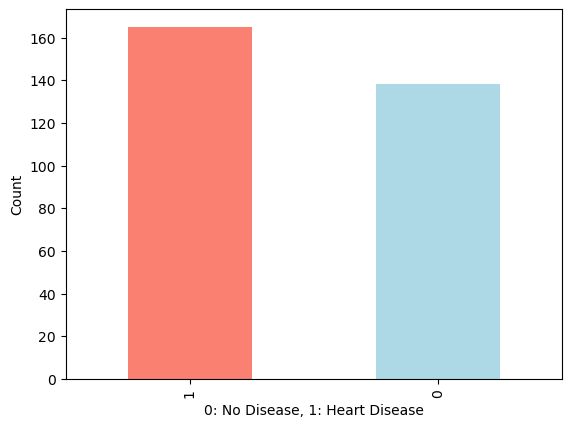

In [572]:
df['target'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No Disease, 1: Heart Disease')
plt.ylabel('Count');

In [573]:
# Xem thông kế mô tả cơ bản cho các cột trong data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [574]:
df.corr()['target'][:-1] 

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
Name: target, dtype: float64

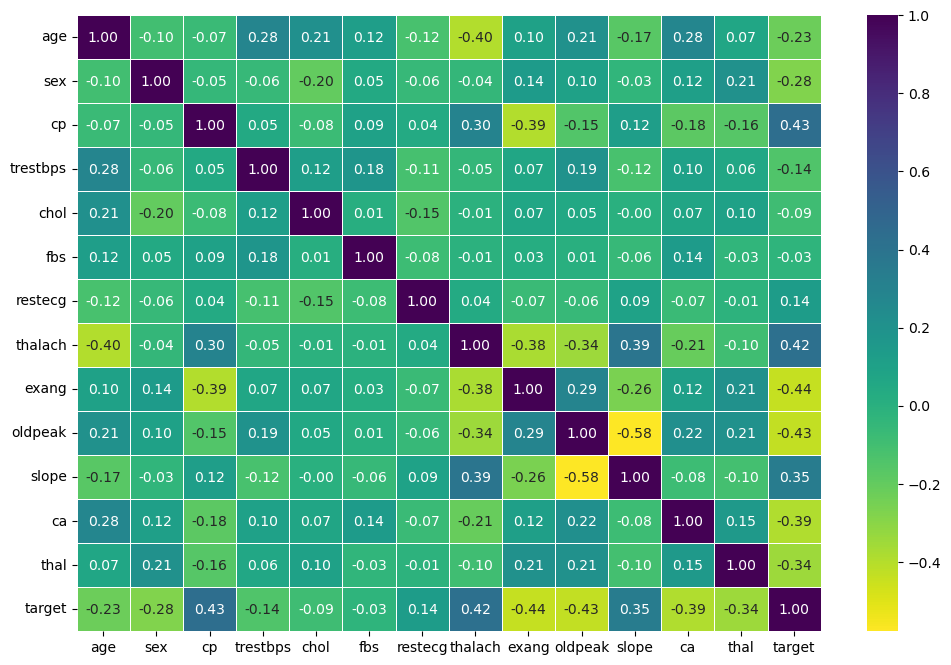

In [575]:
# visualization
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

#### Nhận xét sự tương quan giữa các biến

- Tuổi (age): -0.225439
Nhận xét: Có mối quan hệ tuyến tính âm yếu giữa tuổi và khả năng mắc bệnh tim. Điều này cho thấy rằng khi tuổi tăng, khả năng mắc bệnh tim có xu hướng giảm nhẹ, nhưng mối quan hệ này không mạnh.

- Giới tính (sex): -0.280937
Nhận xét: Có mối quan hệ tuyến tính âm yếu giữa giới tính và khả năng mắc bệnh tim. Điều này cho thấy rằng nam giới (thường được mã hóa là 1) có xu hướng mắc bệnh tim cao hơn so với nữ giới (thường được mã hóa là 0).

- Loại đau ngực (cp):0.433798
Nhận xét: Có mối quan hệ tuyến tính dương trung bình giữa loại đau ngực và khả năng mắc bệnh tim. Điều này cho thấy rằng loại đau ngực có thể là một yếu tố quan trọng trong việc xác định khả năng mắc bệnh tim.

- Huyết áp lúc nghỉ (trestbps):-0.144931
Nhận xét: Có mối quan hệ tuyến tính âm rất yếu giữa huyết áp lúc nghỉ và khả năng mắc bệnh tim. Điều này cho thấy rằng huyết áp lúc nghỉ không phải là một yếu tố quan trọng trong việc xác định khả năng mắc bệnh tim. => LOẠI BỎ 

- Mức cholesterol (chol): Hệ số tương quan: -0.085239
Nhận xét: Có mối quan hệ tuyến tính âm rất yếu giữa mức cholesterol và khả năng mắc bệnh tim. Điều này cho thấy rằng mức cholesterol không phải là một yếu tố quan trọng trong việc xác định khả năng mắc bệnh tim. => LOẠI BỎ 

- Đường huyết lúc đói (fbs):Hệ số tương quan: -0.028046
Nhận xét: Có mối quan hệ tuyến tính âm rất yếu giữa đường huyết lúc đói và khả năng mắc bệnh tim. Điều này cho thấy rằng đường huyết lúc đói không phải là một yếu tố quan trọng trong việc xác định khả năng mắc bệnh tim. =>LOẠI BỎ

- Kết quả điện tâm đồ lúc nghỉ (restecg): Hệ số tương quan: 0.137230
Nhận xét: Có mối quan hệ tuyến tính dương rất yếu giữa kết quả điện tâm đồ lúc nghỉ và khả năng mắc bệnh tim. Điều này cho thấy rằng kết quả điện tâm đồ lúc nghỉ không phải là một yếu tố quan trọng trong việc xác định khả năng mắc bệnh tim. => LOẠI BỎ

- Nhịp tim tối đa đạt được (thalach): 0.421741
Nhận xét: Có mối quan hệ tuyến tính dương trung bình giữa nhịp tim tối đa đạt được và khả năng mắc bệnh tim. Điều này cho thấy rằng nhịp tim tối đa đạt được có thể là một yếu tố quan trọng trong việc xác định khả năng mắc bệnh tim.

- Đau thắt ngực do gắng sức (exang): -0.436757
Nhận xét: Có mối quan hệ tuyến tính âm trung bình giữa đau thắt ngực do gắng sức và khả năng mắc bệnh tim. Điều này cho thấy rằng đau thắt ngực do gắng sức có thể là một yếu tố quan trọng trong việc xác định khả năng mắc bệnh tim.

- Độ dốc ST (oldpeak):-0.430696
Nhận xét: Có mối quan hệ tuyến tính âm trung bình giữa độ dốc ST và khả năng mắc bệnh tim. Điều này cho thấy rằng độ dốc ST có thể là một yếu tố quan trọng trong việc xác định khả năng mắc bệnh tim.

- Độ dốc của đoạn ST (slope): 0.345877
Nhận xét: Có mối quan hệ tuyến tính dương trung bình giữa độ dốc của đoạn ST và khả năng mắc bệnh tim. Điều này cho thấy rằng độ dốc của đoạn ST có thể là một yếu tố quan trọng trong việc xác định khả năng mắc bệnh tim.

- Số lượng mạch chính (ca):-0.391724
Nhận xét: Có mối quan hệ tuyến tính âm trung bình giữa số lượng mạch chính và khả năng mắc bệnh tim. Điều này cho thấy rằng số lượng mạch chính có thể là một yếu tố quan trọng trong việc xác định khả năng mắc bệnh tim.

- Thalassemia (thal): -0.344029
Nhận xét: Có mối quan hệ tuyến tính âm trung bình giữa thalassemia và khả năng mắc bệnh tim. Điều này cho thấy rằng thalassemia có thể là một yếu tố quan trọng trong việc xác định khả năng mắc bệnh tim.

In [576]:
# loại bỏ các biến có tương quan cao với nhau và tương quan thấp với biển mục tiêu để mô hình xử lý tốt hơn 
df = df.drop('fbs', axis=1)
df = df.drop('restecg', axis=1)
df = df.drop('chol', axis=1)
df = df.drop('trestbps', axis=1)


In [577]:
df.head()   

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


### TRỰC QUAN HÓA VÀ PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA)

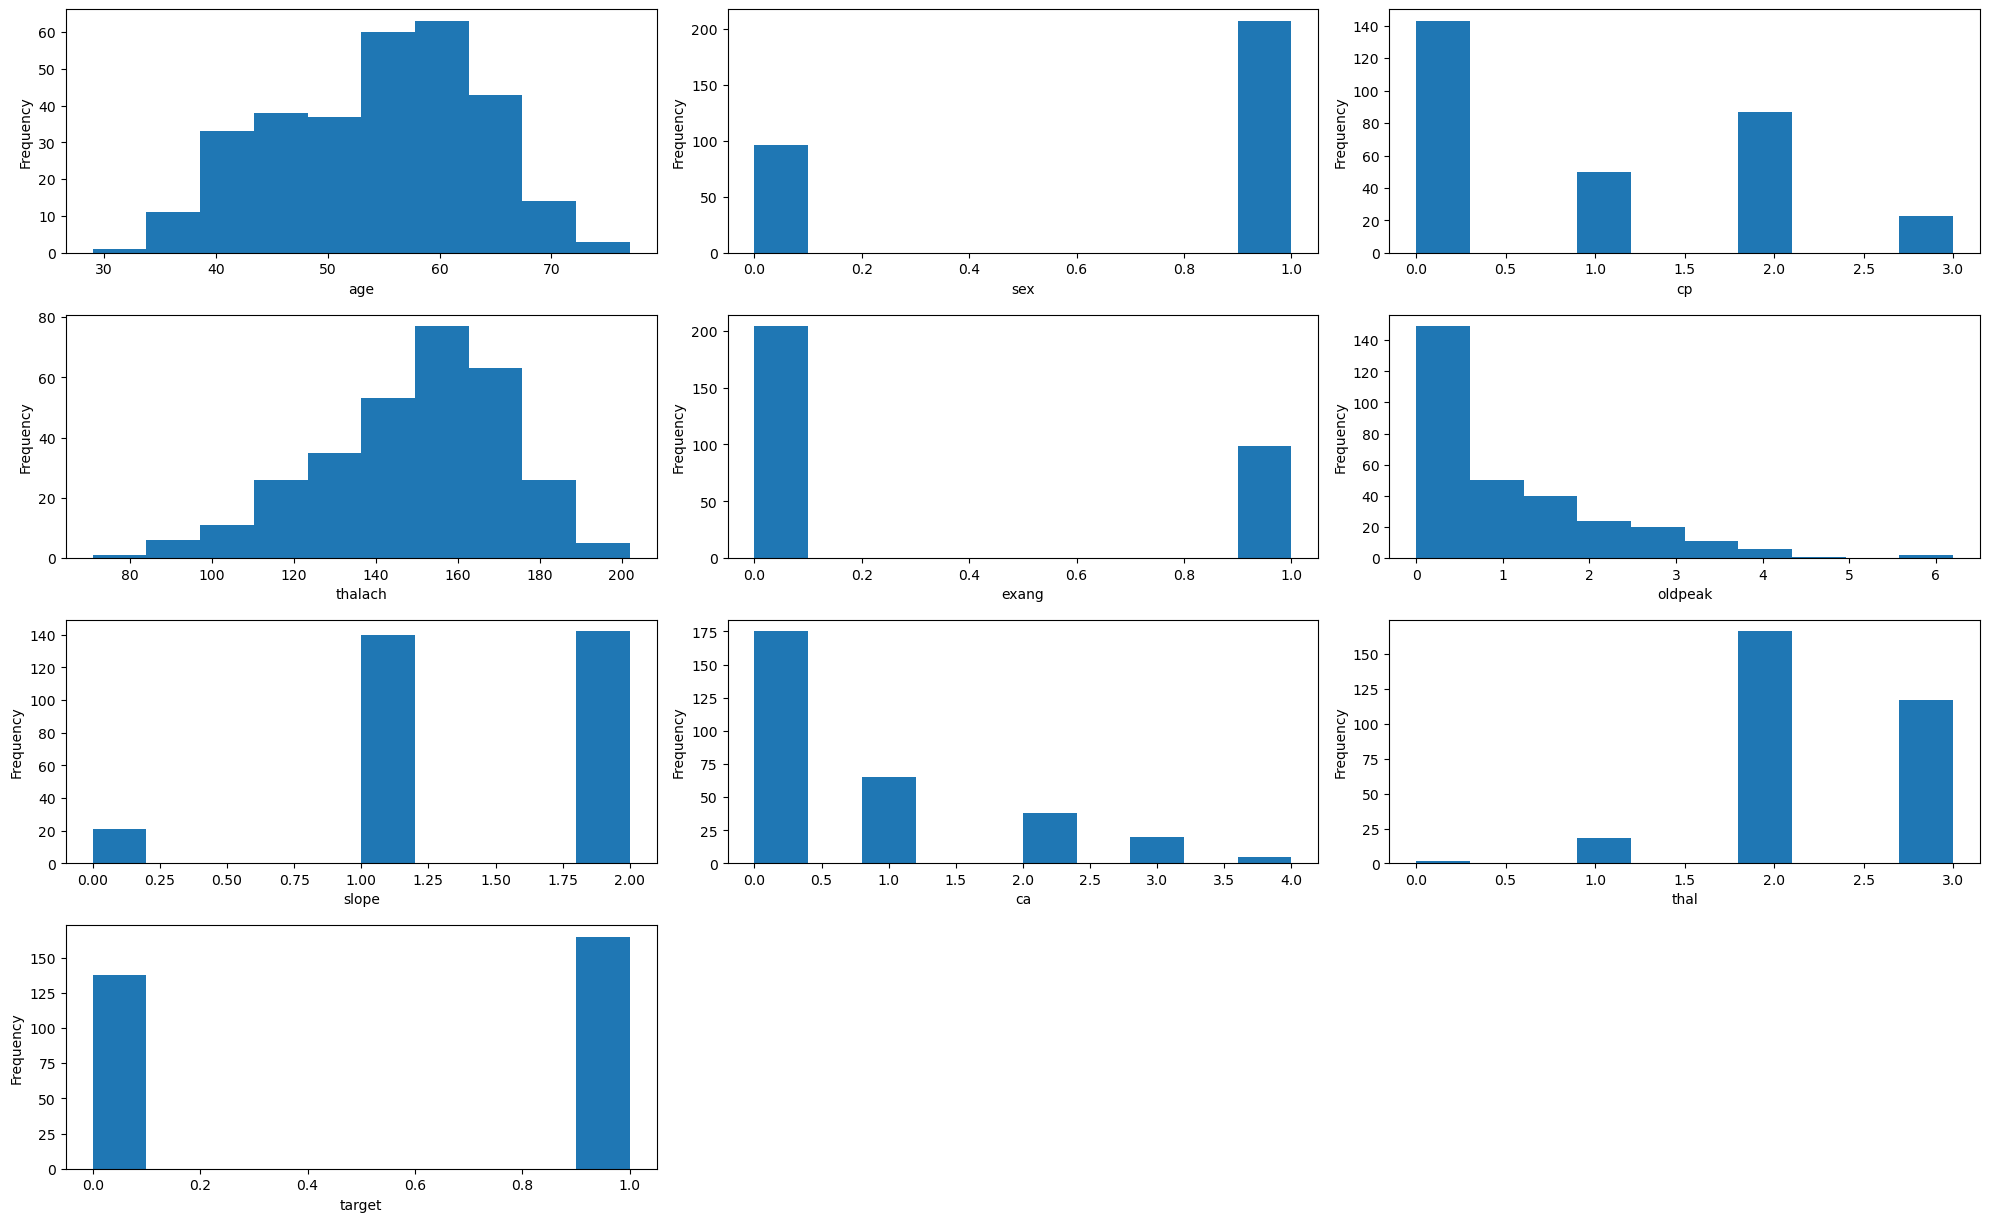

In [578]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 15))
i = 0
for col in df.columns:
    i += 1
    ax = plt.subplot(5, 3, i)
    df[col].hist(ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(False)  # Tắt các đường lưới

plt.tight_layout()
plt.show()

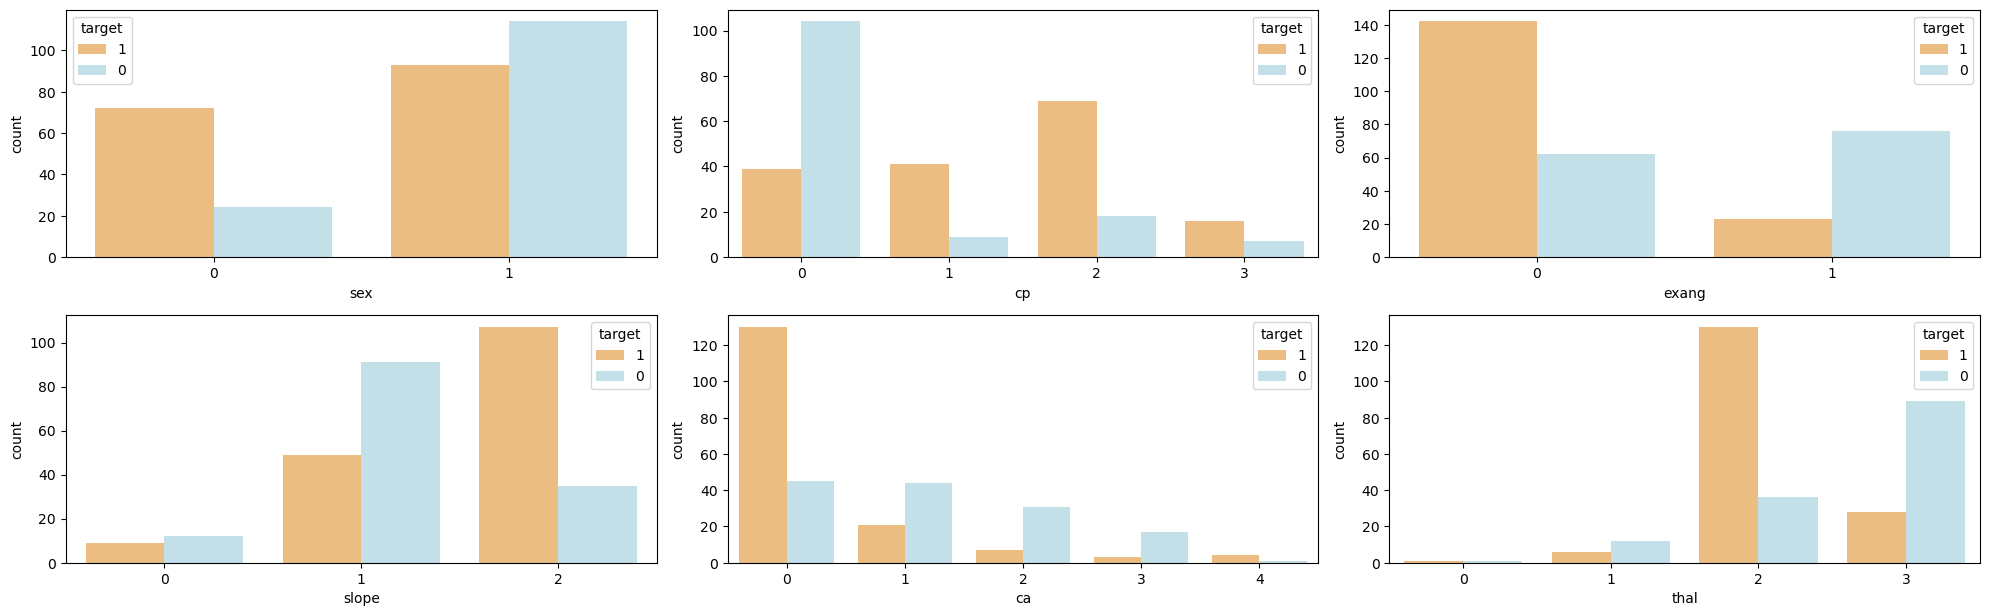

In [579]:
cast_list = ['sex','cp', 'exang', 'slope', 'ca', 'thal']

# Ensure 'target' is treated as a categorical variable
df['target'] = df['target'].astype(str)

fig = plt.figure(figsize=(20, 15))

for i in range(len(cast_list)):
    column = cast_list[i]
    sub = fig.add_subplot(5, 3, i + 1)
    chart = sns.countplot(data=df, x=column, hue='target', palette='RdYlBu')

plt.tight_layout()
plt.show()

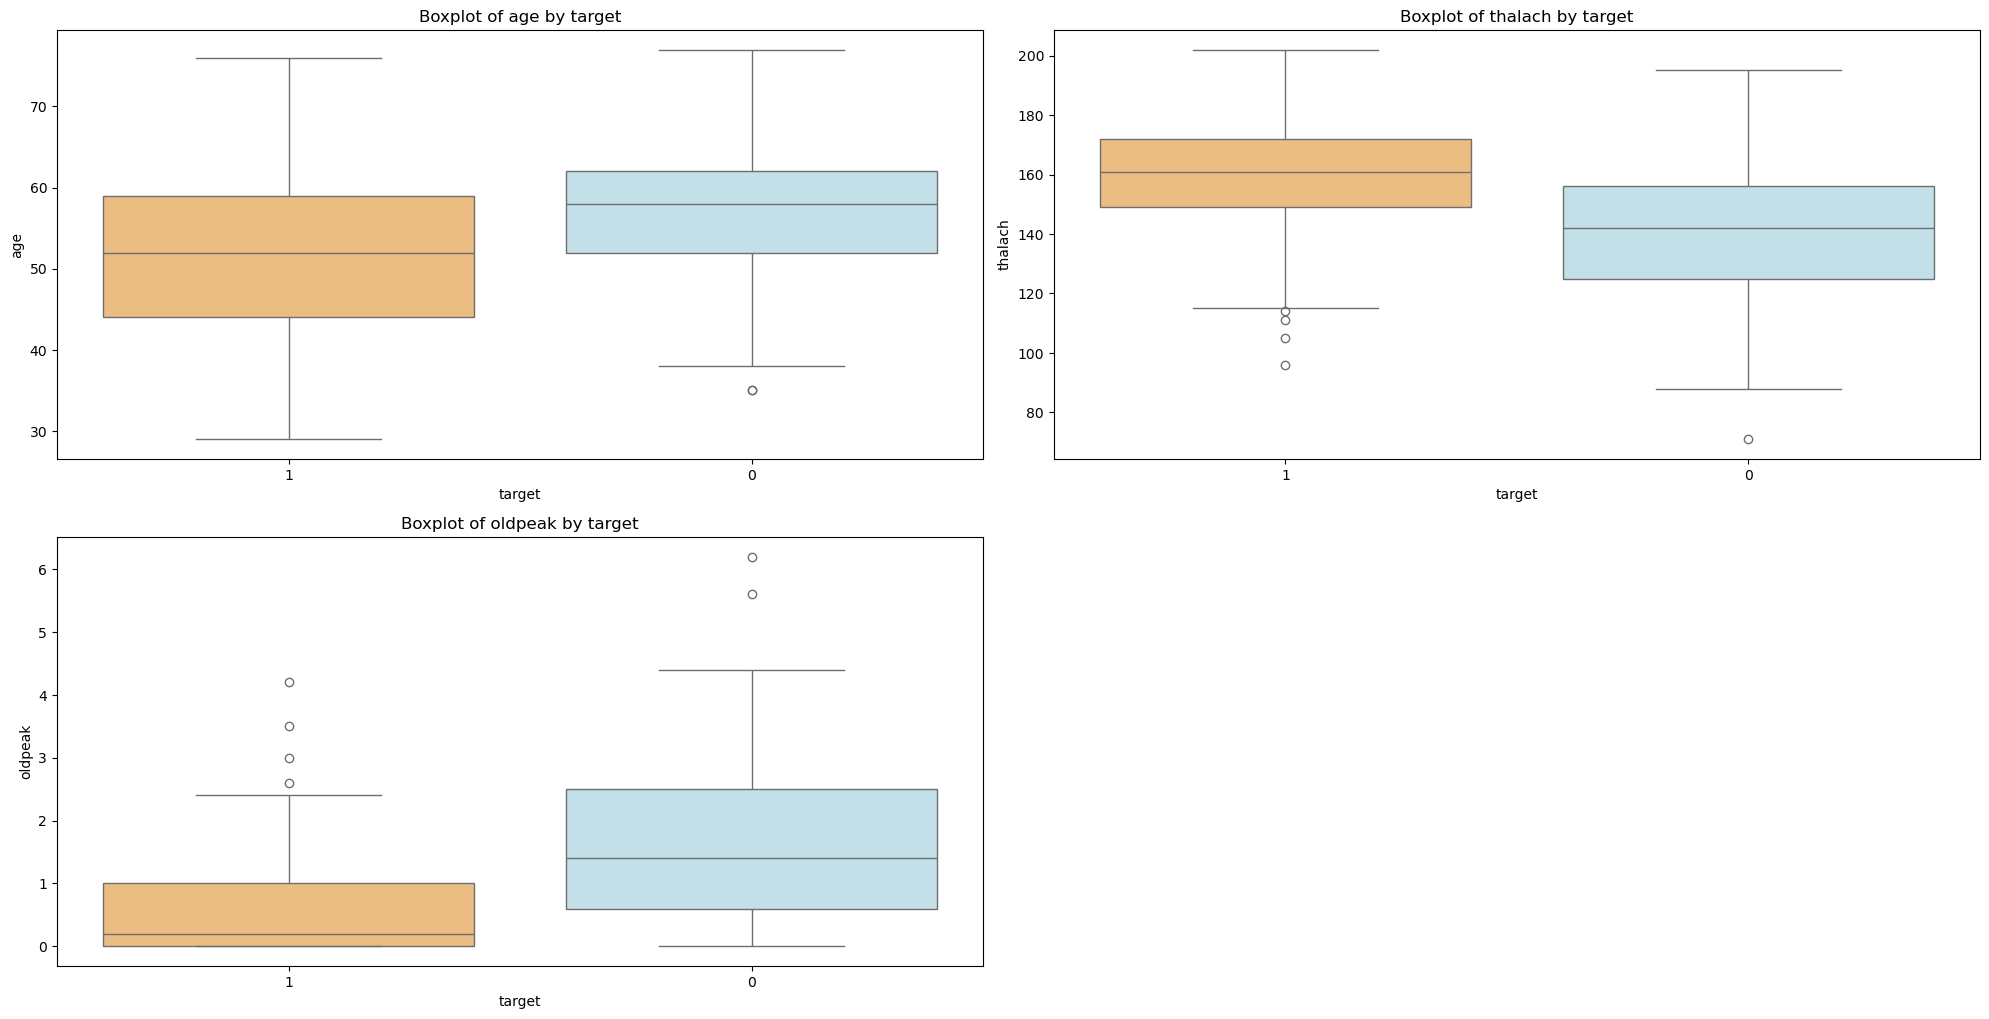

In [580]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các biến số
num_list = ['age', 'thalach', 'oldpeak']

# Tạo figure với kích thước 20x20
fig = plt.figure(figsize=(20, 20))

# Vẽ boxplot cho từng biến số theo biến mục tiêu
for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(4, 2, i + 1)
    sns.boxplot(data=df, x='target', y=column, hue='target', palette='RdYlBu', legend=False)
    sub.set_title(f'Boxplot of {column} by target')

plt.tight_layout()
plt.show()

In [581]:
df.columns

Index(['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target'],
      dtype='object')

# Modelling

In [582]:
df.head(2)

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1


In [583]:
# tách các đặc trưng và nhãn
X = df.drop('target', axis=1)
y = df['target']

In [584]:
# tách thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [585]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 9), (61, 9), (242,), (61,))

In [586]:
# Chuẩn hoá dữ liệu tập train
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age', 'sex','cp','thalach','exang','oldpeak','slope','ca','thal']] = scaler.fit_transform(X_train[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']])
X_train.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
132,0.270833,1.0,0.333333,0.649123,0.0,0.000000,1.0,0.0,0.666667
202,0.604167,1.0,0.000000,0.201754,1.0,0.142857,1.0,0.0,1.000000
196,0.354167,1.0,0.666667,0.517544,0.0,0.642857,0.5,0.0,0.666667
75,0.541667,0.0,0.333333,0.640351,0.0,0.250000,0.5,0.0,0.666667
176,0.645833,1.0,0.000000,0.631579,1.0,0.250000,1.0,0.5,1.000000


In [587]:
# chuẩn hoá dữ liệu tập test
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']] = scaler.fit_transform(X_test[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']])
X_test.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
179,0.621622,1.0,0.000000,0.338843,1.0,0.096774,0.5,0.25,0.333333
228,0.675676,1.0,1.000000,0.727273,0.0,0.032258,0.5,0.00,1.000000
111,0.621622,1.0,0.666667,0.842975,0.0,0.032258,1.0,0.25,1.000000
246,0.594595,0.0,0.000000,0.652893,1.0,0.306452,0.5,0.50,1.000000
60,1.000000,0.0,0.666667,0.487603,0.0,0.000000,1.0,0.25,0.666667


# Model Training

In [588]:
# put models in dictionary

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForestClassifer': RandomForestClassifier()
}

# create function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evalute given machine learning models.
    models: a dictionary of different scikit learn machine learning models
    X_train: training date (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test : testing labels
    returns model scores dictionary.
    """
    
    # set random seed
    np.random.seed(42)
    
    # make dictonary to keep scores
    model_scores = {}
    
    # loop through models to fit and score
    for model_name, model in models.items():
        model.fit(X_train, y_train) # fit model
        score = model.score(X_test, y_test) # get score
        model_scores[model_name] = score # put score for each model
        
    return model_scores        

In [589]:
# fit and score
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

{'LogisticRegression': 0.9016393442622951,
 'KNN': 0.8360655737704918,
 'RandomForestClassifer': 0.819672131147541}

In [590]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.head()

,LogisticRegression,KNN,RandomForestClassifer
accuracy,0.901639,0.836066,0.819672


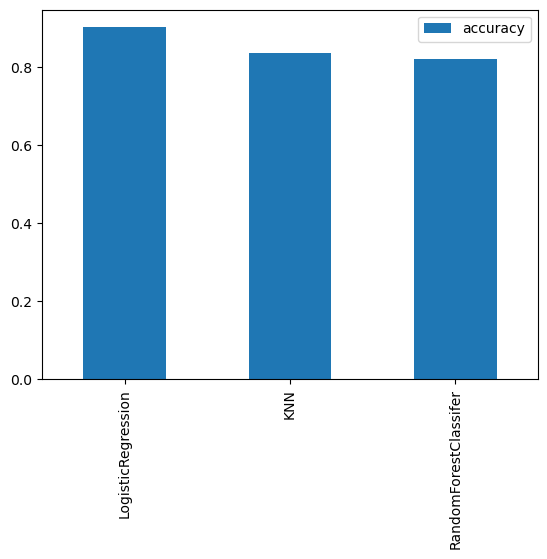

In [591]:
model_compare.T.plot(kind='bar');

### Sau khi chạy thử các mô hình ta có thể thấy, mô hình logistic regression có độ chỉnh xác cao nhất => thực hiện lưu mô hình này lại

# Tuning or Improving our models

# Hyperparameter Tuning - using GridSearchCV

( Điều chỉnh tham số để tìm ra được tham số tốt nhất cho mô hình )

In [592]:
# create hyperparameter grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                                          log_reg_grid, 
                                          cv=5, 
                                          verbose=True)

# train the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [593]:
# get best parameters
gs_log_reg.best_params_

{'C': 78.47599703514607, 'solver': 'liblinear'}

In [594]:
# get the score
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# Evaluating Models

In [595]:
# make predictions
y_preds = gs_log_reg.predict(X_test)

In [596]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [597]:
# hiển thị classification report for logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_preds = log_reg.predict(X_test)
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



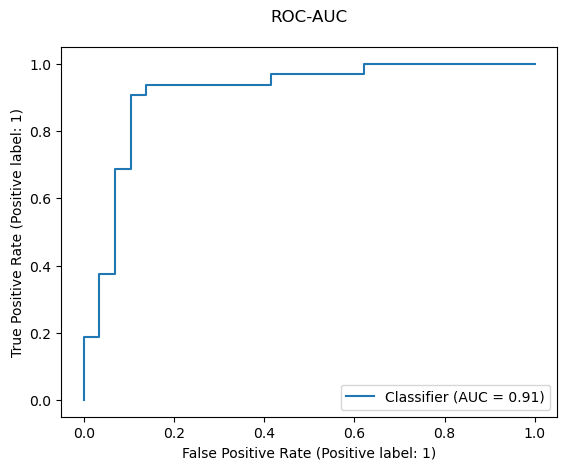

In [598]:
# # ROC curve and AUC for logistic regression
from sklearn.metrics import RocCurveDisplay

# Ensure y_test is in integer format
y_test_int = y_test.astype(int)

y_score = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test_int, y_score)
plt.title('ROC-AUC\n')
plt.show()

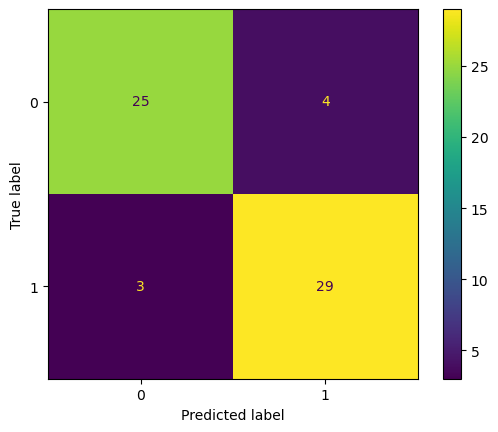

In [599]:
ConfusionMatrixDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [600]:
model = LogisticRegression(C=0.23357214690901212, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [601]:
# check Coefficient of features
model.coef_

array([[-0.28032252, -0.82859111,  1.16701872,  0.80775459, -0.92989882,
        -0.81658043,  0.98017043, -1.05073846, -0.5332499 ]])

In [602]:
df.head(2)

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1


In [603]:
# Match coef's of features to columns name
feature_dict = dict(zip(df.columns, list(model.coef_[0])))

feature_dict

{'age': -0.28032251863868757,
 'sex': -0.8285911061561356,
 'cp': 1.1670187231161726,
 'thalach': 0.8077545948754445,
 'exang': -0.9298988210088872,
 'oldpeak': -0.8165804250415633,
 'slope': 0.9801704316717587,
 'ca': -1.0507384579375751,
 'thal': -0.5332499012099812}

<Axes: title={'center': 'Feature Importance of Logistic Regression'}>

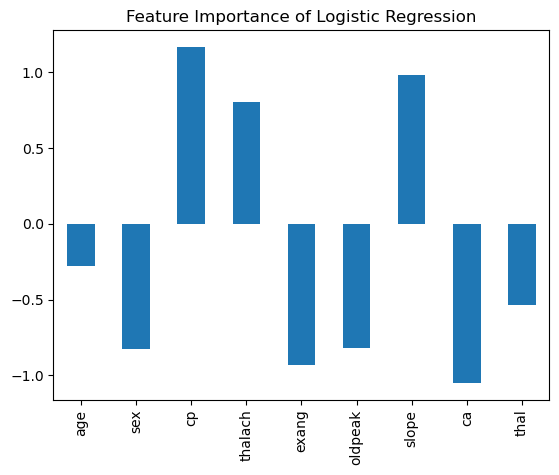

In [604]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title='Feature Importance of Logistic Regression', legend=False)

In [605]:
X.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,150,0,2.3,0,0,1
1,37,1,2,187,0,3.5,0,0,2
2,41,0,1,172,0,1.4,2,0,2
3,56,1,1,178,0,0.8,2,0,2
4,57,0,0,163,1,0.6,2,0,2


In [606]:
X.columns

Index(['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal'],
      dtype='object')

## Lưu mô hình

In [607]:
import joblib

# lưu mô hình logistic regression
joblib.dump(gs_log_reg, 'logistic_regression_model.pkl')



['logistic_regression_model.pkl']

### Đưa ra dự đoán

In [608]:
def predict_Heart_Disease(age,sex,cp,thalach, exang, oldpeak, slope, ca, thal):    
    #loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = age
    x[1] = sex
    x[2] = cp
    x[3] = thalach
    x[4] = exang
    x[5] = oldpeak
    x[6] = slope
    x[7] = ca
    x[8] = thal
    #if loc_index >= 0:
       #x[loc_index] = 1

    return gs_log_reg.predict([x])[0]